In [85]:
import numpy as np
import pandas as pd
import time

# 象山美院小区数据
csv = pd.read_csv('../resource/测试数据3.csv')

# 将时间戳转换为时间格式，并化为分钟级时间
index = csv.get('MRO_TS')
index
for i in range(len(csv)):
    index[i] = time.strftime("%Y-%m-%d %H:%M", time.localtime(index[i]))

# 删除整列NaN
for i in csv.columns:
    count = 0
    for j in range(len(csv)):
        if pd.isnull(csv.loc[j, i]):
            count += 1
            # csv.loc[j, i] = 0 # 使用非空值填充空值
    if count == len(csv):
        csv.drop(labels=i, axis=1, inplace=True)

csv = csv[:][pd.isna(csv['OPT_LON']) == False]
csv = csv[:][pd.isna(csv['OPT_LAT']) == False]
csv = csv[:][pd.isna(csv['IMSI']) == False]
csv = csv[:][pd.isna(csv['MRO_TS']) == False]
csv = csv[:][pd.isna(csv['S_CELL_ID']) == False]

# 去除重复行
csv = csv.drop_duplicates()
csv

C:\Users\mapple\AppData\Local\Temp\ipykernel_8528\4275887428.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  index[i] = time.strftime("%Y-%m-%d %H:%M", time.localtime(index[i]))


,id,N1_CELL_ID,N1_RSRP,N2_CELL_ID,N2_RSRP,N3_CELL_ID,N3_RSRP,N4_CELL_ID,N4_RSRP,N5_CELL_ID,...,MROID,S_RSRP,MRO_TS,IMSI,MSISDN,OPT_LON,OPT_LAT,PLANID,CT,DS
0,0,202122306,-104,211108931.0,-108.0,211108930.0,-108.0,NaN,NaN,NaN,...,0,-104,2022-06-16 11:48,460026681824928,18258854632-35671908202122306,NaN,NaN,1004,571,2022061611
1,1,193700872,-89,201398339.0,-95.0,193700871.0,-96.0,NaN,NaN,NaN,...,0,-89,2022-06-16 11:50,460074422781039,19522780171-86455103193700872,120.068765,30.149113,2332,571,2022061611
2,2,193700872,-99,201398339.0,-103.0,101122561.0,-104.0,193700871.0,-106.0,79831171.0,...,0,-99,2022-06-16 11:50,460026684729243,18268327723-35314276193700872,120.069108,30.149220,2332,571,2022061611
3,3,193700872,-91,201398339.0,-93.0,211552321.0,-94.0,193700871.0,-95.0,101122561.0,...,0,-91,2022-06-16 11:53,460008132348151,13738113170-35494844193700872,120.068807,30.149284,2332,571,2022061611
4,4,193700872,-96,201398339.0,-106.0,101110786.0,-107.0,NaN,NaN,NaN,...,0,-96,2022-06-16 11:50,460009182372518,13739187712-86556004193700872,120.068807,30.149638,2332,571,2022061611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,193493762,-103,121617857.0,-106.0,NaN,NaN,NaN,NaN,NaN,...,0,-103,2022-06-16 11:58,460028578509011,15857861606-86589304193493762,120.071854,30.154820,2222,571,2022061611
9996,9996,193493762,-109,121617857.0,-109.0,185197827.0,-111.0,80105857.0,-113.0,NaN,...,0,-109,2022-06-16 11:49,460027581135959,18758574090-86730503193493762,120.071747,30.154885,2332,571,2022061611
9997,9997,193493762,-112,121617857.0,-117.0,NaN,NaN,NaN,NaN,NaN,...,0,-112,2022-06-16 11:52,460027582214495,18758599906-86347604193493762,120.071790,30.154853,2222,571,2022061611
9998,9998,193493762,-105,121617857.0,-106.0,185197827.0,-112.0,NaN,NaN,NaN,...,0,-105,2022-06-16 11:57,460022517658048,15251760205-86495204193493762,120.071726,30.154960,2332,571,2022061611


In [86]:
csv.reset_index(drop=True, inplace=True)
csv

,id,N1_CELL_ID,N1_RSRP,N2_CELL_ID,N2_RSRP,N3_CELL_ID,N3_RSRP,N4_CELL_ID,N4_RSRP,N5_CELL_ID,...,MROID,S_RSRP,MRO_TS,IMSI,MSISDN,OPT_LON,OPT_LAT,PLANID,CT,DS
0,0,202122306,-104,211108931.0,-108.0,211108930.0,-108.0,NaN,NaN,NaN,...,0,-104,2022-06-16 11:48,460026681824928,18258854632-35671908202122306,NaN,NaN,1004,571,2022061611
1,1,193700872,-89,201398339.0,-95.0,193700871.0,-96.0,NaN,NaN,NaN,...,0,-89,2022-06-16 11:50,460074422781039,19522780171-86455103193700872,120.068765,30.149113,2332,571,2022061611
2,2,193700872,-99,201398339.0,-103.0,101122561.0,-104.0,193700871.0,-106.0,79831171.0,...,0,-99,2022-06-16 11:50,460026684729243,18268327723-35314276193700872,120.069108,30.149220,2332,571,2022061611
3,3,193700872,-91,201398339.0,-93.0,211552321.0,-94.0,193700871.0,-95.0,101122561.0,...,0,-91,2022-06-16 11:53,460008132348151,13738113170-35494844193700872,120.068807,30.149284,2332,571,2022061611
4,4,193700872,-96,201398339.0,-106.0,101110786.0,-107.0,NaN,NaN,NaN,...,0,-96,2022-06-16 11:50,460009182372518,13739187712-86556004193700872,120.068807,30.149638,2332,571,2022061611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,193493762,-103,121617857.0,-106.0,NaN,NaN,NaN,NaN,NaN,...,0,-103,2022-06-16 11:58,460028578509011,15857861606-86589304193493762,120.071854,30.154820,2222,571,2022061611
9996,9996,193493762,-109,121617857.0,-109.0,185197827.0,-111.0,80105857.0,-113.0,NaN,...,0,-109,2022-06-16 11:49,460027581135959,18758574090-86730503193493762,120.071747,30.154885,2332,571,2022061611
9997,9997,193493762,-112,121617857.0,-117.0,NaN,NaN,NaN,NaN,NaN,...,0,-112,2022-06-16 11:52,460027582214495,18758599906-86347604193493762,120.071790,30.154853,2222,571,2022061611
9998,9998,193493762,-105,121617857.0,-106.0,185197827.0,-112.0,NaN,NaN,NaN,...,0,-105,2022-06-16 11:57,460022517658048,15251760205-86495204193493762,120.071726,30.154960,2332,571,2022061611


In [87]:
from sklearn.preprocessing import OneHotEncoder

class LocalOneHotEncoder(object):

  def __init__(self, target_columns):
    '''
    @param: target_columns --- To perform one-hot encoding column name list. 
    '''
    self.enc = OneHotEncoder(handle_unknown='ignore')
    self.col_names = target_columns

  def fit(self, df):
    '''
    @param: df --- pandas DataFrame
    '''
    self.enc.fit(df[self.col_names].values)
    self.labels = np.array(self.enc.categories_).ravel()
    self.new_col_names = self.gen_col_names(df)

  def gen_col_names(self, df):
    '''
    @param:  df --- pandas DataFrame
    '''
    new_col_names = []
    for col in self.col_names:
      for val in df[col].unique():
        new_col_names.append("{}_{}".format(col, val))
    return new_col_names

  def transform(self, df):
     '''
     @param:  df --- pandas DataFrame
     '''
     return pd.DataFrame(data = self.enc.transform(df[self.col_names]).toarray(), 
                         columns = self.new_col_names, 
                         dtype=int) 

ONEHOT_COLUMNS = ['N1_CELL_ID', 'N2_CELL_ID', 'N3_CELL_ID', 'N4_CELL_ID', 'N5_CELL_ID', 'N6_CELL_ID', 'N7_CELL_ID']
local_ohe = LocalOneHotEncoder(ONEHOT_COLUMNS)
local_ohe.fit(csv)
oht_df = local_ohe.transform(csv)
oht_df

e:\visual studio code\研究生\machine-learning\markdown\other\jupyter\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(


,N1_CELL_ID_202122306,N1_CELL_ID_193700872,N1_CELL_ID_201741123,N1_CELL_ID_210581829,N1_CELL_ID_155217797,N1_CELL_ID_202122305,N1_CELL_ID_201741124,N1_CELL_ID_185197832,N1_CELL_ID_185197833,N1_CELL_ID_185409028,...,N1_CELL_ID_184929026,N1_CELL_ID_153234818,N1_CELL_ID_53541314,N1_CELL_ID_121223875,N1_CELL_ID_80105858,N1_CELL_ID_53531844,N1_CELL_ID_201398369,N1_CELL_ID_210631746,N1_CELL_ID_211108929,N1_CELL_ID_210581828
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
# t-SNE降维
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2) 
X_tsne = tsne.fit_transform(oht_df)
X_tsne

e:\visual studio code\研究生\machine-learning\markdown\other\jupyter\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
e:\visual studio code\研究生\machine-learning\markdown\other\jupyter\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[-36.62172  , -51.70608  ],
       [-31.39655  , -41.685623 ],
       [-31.545717 , -42.043167 ],
       ...,
       [ 19.778059 ,  -5.6875615],
       [ 30.082605 , -31.181    ],
       [ 40.006435 ,   0.6990957]], dtype=float32)

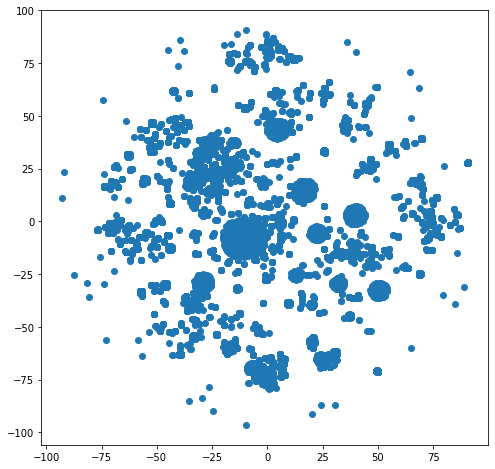

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(X_tsne[:, 0].T, X_tsne[:, 1].T)
plt.show()

e:\visual studio code\研究生\machine-learning\markdown\other\jupyter\lib\site-packages\sklearn\cluster\_optics.py:903: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


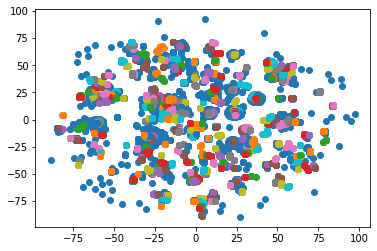

In [51]:
# optics聚类
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import OPTICS
from matplotlib import pyplot

# 定义数据集
X = X_tsne
# 定义模型
# model = OPTICS(eps=0.8, min_samples=10)
model = OPTICS(eps=0.8, min_samples=10)
# 模型拟合与聚类预测
yhat = model.fit_predict(X)
# 检索唯一群集
clusters = unique(yhat)
# 为每个群集的样本创建散点图
for cluster in clusters:
    # 获取此群集的示例的行索引
    row_ix = where(yhat == cluster)
    # 创建这些样本的散布
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# 绘制散点图
pyplot.show()

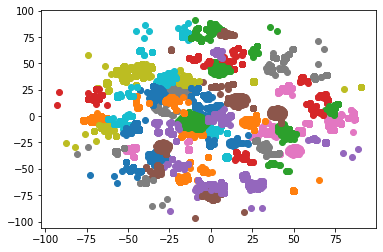

In [78]:
# 亲和力传播聚类
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation
from matplotlib import pyplot

# 定义数据集
X = X_tsne
# 定义模型
model = AffinityPropagation(damping=0.9)
# 匹配模型
model.fit(X)
# 为每个示例分配一个集群
yhat = model.predict(X)
# 检索唯一群集
clusters = unique(yhat)
# 为每个群集的样本创建散点图
for cluster in clusters:
    # 获取此群集的示例的行索引
    row_ix = where(yhat == cluster)
    # 创建这些样本的散布
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# 绘制散点图
pyplot.show()

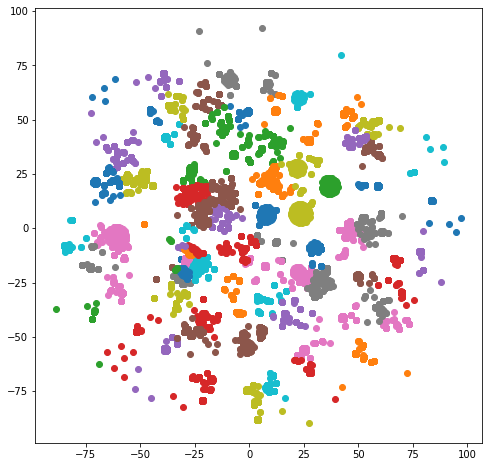

In [60]:
plt.figure(figsize=(8, 8))
for cluster in clusters:
    # 获取此群集的示例的行索引
    row_ix = where(yhat == cluster)
    # 创建这些样本的散布
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
plt.show()

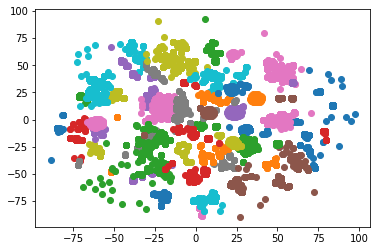

In [63]:
# 高斯混合模型
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
# 定义数据集
X = X_tsne
# 定义模型
model = GaussianMixture(n_components=60)
# 模型拟合
model.fit(X)
# 为每个示例分配一个集群
yhat = model.predict(X)
# 检索唯一群集
clusters = unique(yhat)
# 为每个群集的样本创建散点图
for cluster in clusters:
    # 获取此群集的示例的行索引
    row_ix = where(yhat == cluster)
    # 创建这些样本的散布
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# 绘制散点图
pyplot.show()

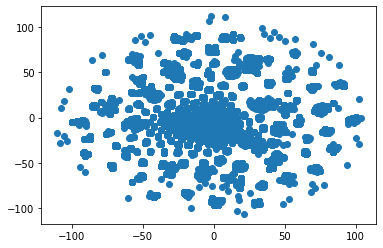

In [44]:
# 均值漂移聚类
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import MeanShift
from matplotlib import pyplot

# 定义数据集
X = X_tsne
# 定义模型
model = MeanShift()
# 模型拟合与聚类预测
yhat = model.fit_predict(X)
# 检索唯一群集
clusters = unique(yhat)
# 为每个群集的样本创建散点图
for cluster in clusters:
    # 获取此群集的示例的行索引
    row_ix = where(yhat == cluster)
    # 创建这些样本的散布
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# 绘制散点图
pyplot.show()

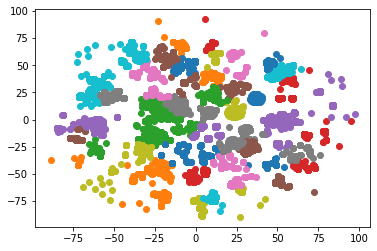

In [66]:
# mini-batch k均值聚类
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import MiniBatchKMeans
from matplotlib import pyplot
# 定义数据集
X = X_tsne
# 定义模型
model = MiniBatchKMeans(n_clusters=60)
# 模型拟合
model.fit(X)
# 为每个示例分配一个集群
yhat = model.predict(X)
# 检索唯一群集
clusters = unique(yhat)
# 为每个群集的样本创建散点图
for cluster in clusters:
    # 获取此群集的示例的行索引
    row_ix = where(yhat == cluster)
    # 创建这些样本的散布
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# 绘制散点图
pyplot.show()

In [79]:
from geopy.distance import geodesic
import datetime

# 时间比较函数
def compare_time(startTime, endTime):
    d_start = datetime.datetime.strptime(startTime, '%Y-%m-%d %H:%M')
    d_end = datetime.datetime.strptime(endTime, '%Y-%m-%d %H:%M')
    if d_start == d_end:
        return False
    else:
        return True

# MRO_TS时间到分钟，时间应该一致
# IMSI不一致，确保是两个不同的人
# MRO_TS1 IMSI1  MRO_TS2 IMSI2 LON1 LAT1 LON2 LAT2 category DISTANCE
# ['MRO_TS', 'IMSI', 'OPT_LON', 'OPT_LAT']
content = []
category = 0
for cluster in clusters:
    category += 1
    row_ix = where(yhat == cluster)
    for dim in range(len(row_ix)):
        for i in range(len(row_ix[dim])):
            j = i + 1
            while j < len(row_ix[dim]):
                # print(csv.loc[row_ix[dim][i], 'IMSI'], csv.loc[row_ix[dim][j], 'IMSI'], csv.loc[row_ix[dim][i], 'MRO_TS'], csv.loc[row_ix[dim][j], 'MRO_TS'])
                if row_ix[dim][i] == row_ix[dim][j]: 
                    pass
                elif csv.loc[row_ix[dim][i], 'IMSI'] == csv.loc[row_ix[dim][j], 'IMSI'] or compare_time(csv.loc[row_ix[dim][i], 'MRO_TS'], csv.loc[row_ix[dim][j], 'MRO_TS']): pass
                else:
                    distance = geodesic((csv.loc[row_ix[dim][i], 'OPT_LAT'], csv.loc[row_ix[dim][i], 'OPT_LON']), (csv.loc[row_ix[dim][j], 'OPT_LAT'], csv.loc[row_ix[dim][j], 'OPT_LON'])).m
                    content.append([csv.loc[row_ix[dim][i], 'MRO_TS'], csv.loc[row_ix[dim][i], 'IMSI'], csv.loc[row_ix[dim][j], 'MRO_TS'], csv.loc[row_ix[dim][j], 'IMSI'], csv.loc[row_ix[dim][i], 'OPT_LAT'], csv.loc[row_ix[dim][i], 'OPT_LON'], csv.loc[row_ix[dim][j], 'OPT_LAT'], csv.loc[row_ix[dim][j], 'OPT_LON'], category, distance])
                j += 1
content

[['2022-06-16 11:50',
  460026684729243,
  '2022-06-16 11:50',
  460009182372518,
  30.14922,
  120.069108,
  30.149638,
  120.068807,
  1,
  54.66333772565036],
 ['2022-06-16 11:50',
  460026684729243,
  '2022-06-16 11:50',
  460026588720557,
  30.14922,
  120.069108,
  30.14981,
  120.066833,
  1,
  228.7270742786936],
 ['2022-06-16 11:50',
  460026684729243,
  '2022-06-16 11:50',
  460074422781039,
  30.14922,
  120.069108,
  30.149198,
  120.068743,
  1,
  35.249157756912275],
 ['2022-06-16 11:50',
  460026684729243,
  '2022-06-16 11:50',
  460078681030211,
  30.14922,
  120.069108,
  30.14878,
  120.0687,
  1,
  62.643374304904114],
 ['2022-06-16 11:50',
  460026684729243,
  '2022-06-16 11:50',
  460009182372518,
  30.14922,
  120.069108,
  30.149788,
  120.06885,
  1,
  67.69411504477837],
 ['2022-06-16 11:50',
  460026684729243,
  '2022-06-16 11:50',
  460029671601261,
  30.14922,
  120.069108,
  30.146291,
  120.068464,
  1,
  330.5689562930515],
 ['2022-06-16 11:50',
  4600266

In [80]:
# 数据保存
content_pandas = pd.DataFrame(content, columns=['MRO_TS1', 'IMSI1',  'MRO_TS2', 'IMSI2', 'LON1', 'LAT1', 'LON2', 'LAT2', 'category', 'DISTANCE'])
content_pandas.to_csv('../resource/temp.csv')

In [67]:
# # 选择分区3中的内容进行下一步处理，因为分区3中的数据量足够多，有2157行
# select_zone = content_pandas[:][content_pandas['category'] == 3]
# # 获取两个人同时出现的点，进行去重，获得536组人
# select_people = select_zone[['IMSI1', 'IMSI2']].drop_duplicates()
# select_people.to_csv('../resource/去重.csv')
# select_people

,IMSI1,IMSI2
434,4.600830e+14,4.600220e+14
435,4.600830e+14,4.600290e+14
436,4.600830e+14,4.601380e+14
437,4.600830e+14,4.600230e+14
439,4.600770e+14,4.600090e+14
...,...,...
2580,4.600460e+14,4.600770e+14
2590,4.600740e+14,4.600220e+14
2591,4.600060e+14,4.600780e+14
2594,4.600200e+14,4.600800e+14


In [82]:
# 计算统计每组人的最大距离——近似于弗雷歇算法
select_zone = content_pandas[:][content_pandas['category'] == 1]
select_zone.sort_values(by='DISTANCE')
select_distinct = select_zone.drop_duplicates(subset=['IMSI1', 'IMSI2'], keep='first', inplace=False)
select_distinct
select_distinct.to_csv('../resource/distinct.csv')

In [83]:
select_distinct_new = select_distinct[:][select_distinct['DISTANCE'] <= 250]
select_distinct_new.to_csv('../resource/distinct_250.csv')